In [1]:
import pandas as pd
import numpy as np
import ast

In [2]:
movies_df = pd.read_csv(r'C:\Users\manal\Downloads\tmdb_5000_movies.csv')
credits_df = pd.read_csv(r'C:\Users\manal\Downloads\tmdb_5000_credits.csv')

In [3]:
df = movies_df.merge(credits_df, left_on='id', right_on='movie_id', how='left')

In [4]:
df.drop(columns=[
    'homepage', 'tagline', 'status', 'original_title', 'overview',
    'spoken_languages', 'production_countries', 'movie_id'
], inplace=True)

In [5]:
def extract_names(text, top_n=None):
    try:
        items = ast.literal_eval(text)
        names = [item['name'] for item in items]
        return names[:top_n] if top_n else names
    except:
        return []

In [6]:
def extract_director(crew_text):
    try:
        crew = ast.literal_eval(crew_text)
        for person in crew:
            if person.get('job') == 'Director':
                return person['name']
    except:
        return None

In [7]:
df['genres'] = df['genres'].apply(extract_names)
df['keywords'] = df['keywords'].apply(extract_names)
df['cast'] = df['cast'].apply(lambda x: extract_names(x, top_n=3))
df['director'] = df['crew'].apply(extract_director)
df.drop(columns=['crew'], inplace=True)

In [8]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year

In [9]:
df.dropna(subset=['budget', 'revenue', 'runtime', 'release_date'], inplace=True)

In [10]:
df = df[(df['budget'] > 0) & (df['revenue'] > 0)]

In [11]:
df['log_budget'] = np.log1p(df['budget'])
df['log_revenue'] = np.log1p(df['revenue'])

In [12]:
print(df[['title_x', 'log_budget', 'log_revenue', 'genres', 'cast', 'director']].head())

                                    title_x  log_budget  log_revenue  \
0                                    Avatar   19.283571    21.748578   
1  Pirates of the Caribbean: At World's End   19.519293    20.683485   
2                                   Spectre   19.316769    20.596199   
3                     The Dark Knight Rises   19.336971    20.804790   
4                               John Carter   19.376192    19.464974   

                                          genres  \
0  [Action, Adventure, Fantasy, Science Fiction]   
1                   [Adventure, Fantasy, Action]   
2                     [Action, Adventure, Crime]   
3               [Action, Crime, Drama, Thriller]   
4           [Action, Adventure, Science Fiction]   

                                               cast           director  
0  [Sam Worthington, Zoe Saldana, Sigourney Weaver]      James Cameron  
1     [Johnny Depp, Orlando Bloom, Keira Knightley]     Gore Verbinski  
2      [Daniel Craig, Christoph Wal

In [45]:
selected_columns = ['id', 'title_x', 'budget', 'genres', 'log_budget', 'log_revenue', 'runtime', 'release_year', 'revenue', 'original_language', 'cast', 'director']
df = df[selected_columns]

In [15]:
df

,id,title_x,budget,genres,log_budget,log_revenue,runtime,release_year,revenue,original_language,cast,director
0,19995,Avatar,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19.283571,21.748578,162.0,2009.0,2787965087,en,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron
1,285,Pirates of the Caribbean: At World's End,300000000,"[Adventure, Fantasy, Action]",19.519293,20.683485,169.0,2007.0,961000000,en,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski
2,206647,Spectre,245000000,"[Action, Adventure, Crime]",19.316769,20.596199,148.0,2015.0,880674609,en,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes
3,49026,The Dark Knight Rises,250000000,"[Action, Crime, Drama, Thriller]",19.336971,20.804790,165.0,2012.0,1084939099,en,"[Christian Bale, Michael Caine, Gary Oldman]",Christopher Nolan
4,49529,John Carter,260000000,"[Action, Adventure, Science Fiction]",19.376192,19.464974,132.0,2012.0,284139100,en,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",Andrew Stanton
...,...,...,...,...,...,...,...,...,...,...,...,...
4773,2292,Clerks,27000,[Comedy],10.203629,14.963272,92.0,1994.0,3151130,en,"[Brian O'Halloran, Jeff Anderson, Jason Mewes]",Kevin Smith
4788,692,Pink Flamingos,12000,"[Horror, Comedy, Crime]",9.392745,15.607270,93.0,1972.0,6000000,en,"[Divine, David Lochary, Mary Vivian Pearce]",John Waters
4792,36095,Cure,20000,"[Crime, Horror, Mystery, Thriller]",9.903538,11.502885,111.0,1997.0,99000,ja,"[Koji Yakusho, Masato Hagiwara, Tsuyoshi Ujiki]",Kiyoshi Kurosawa
4796,14337,Primer,7000,"[Science Fiction, Drama, Thriller]",8.853808,12.959282,77.0,2004.0,424760,en,"[Shane Carruth, David Sullivan, Casey Gooden]",Shane Carruth


In [20]:
from warnings import filterwarnings
filterwarnings('ignore')

df.dropna(inplace=True)

In [21]:
df.isnull().sum()

id                   0
title_x              0
budget               0
genres               0
log_budget           0
log_revenue          0
runtime              0
release_year         0
revenue              0
original_language    0
cast                 0
director             0
dtype: int64

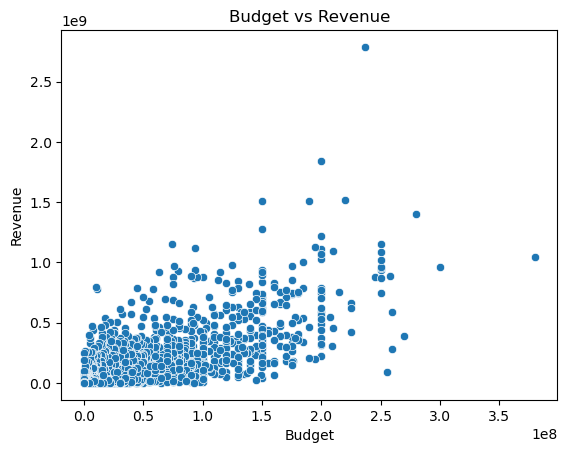

In [23]:
# Budget vs Revenue
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='budget', y='revenue')
plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

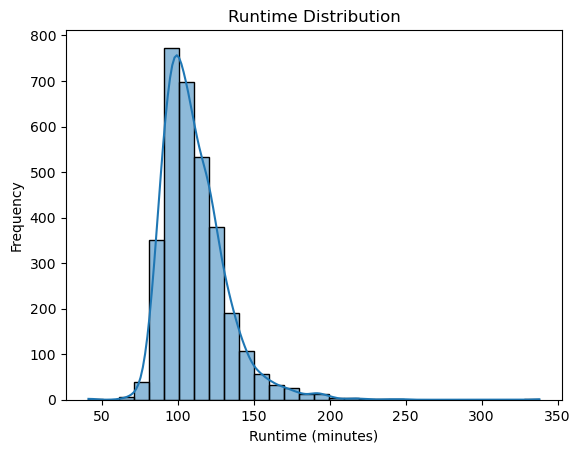

In [24]:
# Runtime Distribution
sns.histplot(df['runtime'], bins=30, kde=True)
plt.title('Runtime Distribution')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.show()

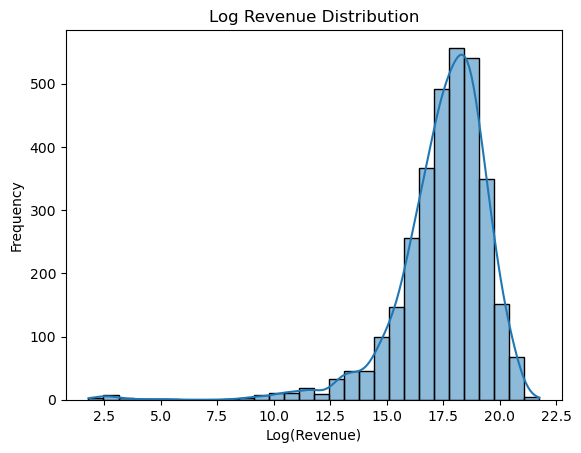

In [25]:
# Revenue Distribution (Log scale)
sns.histplot(df['log_revenue'], bins=30, kde=True)
plt.title('Log Revenue Distribution')
plt.xlabel('Log(Revenue)')
plt.ylabel('Frequency')
plt.show()

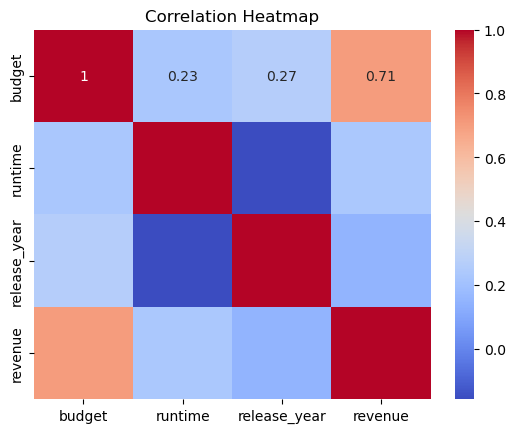

In [26]:
# Correlation Heatmap
sns.heatmap(df[['budget', 'runtime', 'release_year', 'revenue']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

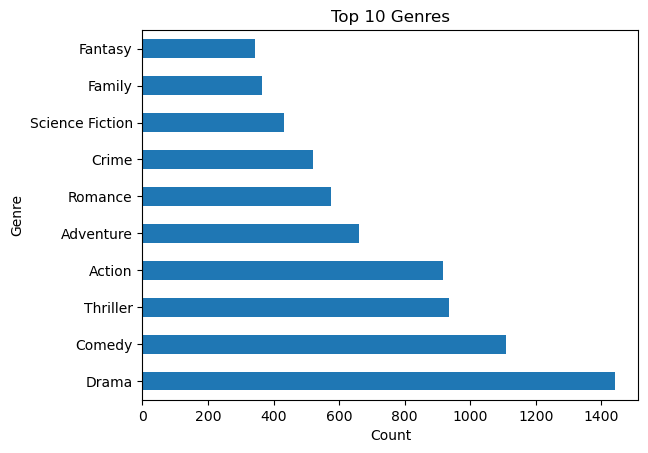

In [29]:
all_genres = df['genres'].explode().value_counts().head(10)
all_genres.plot(kind='barh', title='Top 10 Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

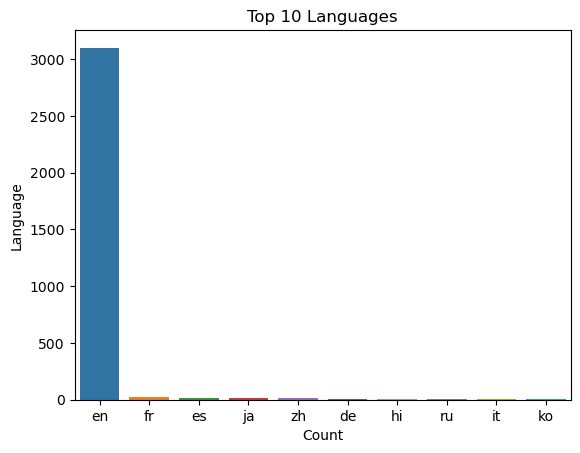

In [31]:
sns.countplot(
    x='original_language',
    data=df,
    order=df['original_language'].value_counts().index[:10]
)
plt.title('Top 10 Languages')
plt.xlabel('Count')
plt.ylabel('Language')
plt.show()

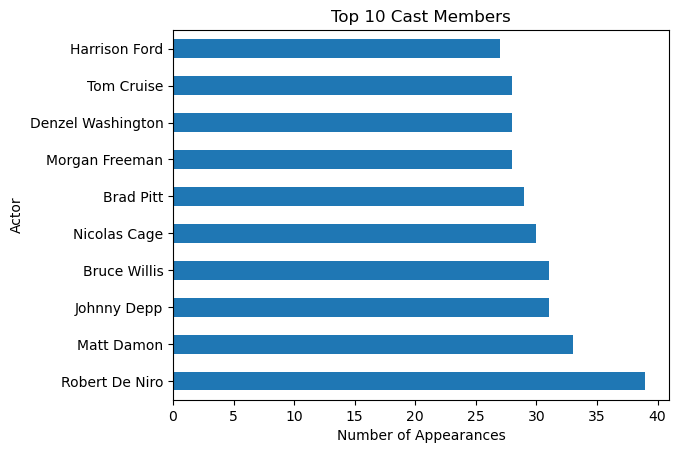

In [33]:
top_cast = df['cast'].explode().value_counts().head(10)
top_cast.plot(kind='barh', title='Top 10 Cast Members')
plt.xlabel('Number of Appearances')
plt.ylabel('Actor')
plt.show()

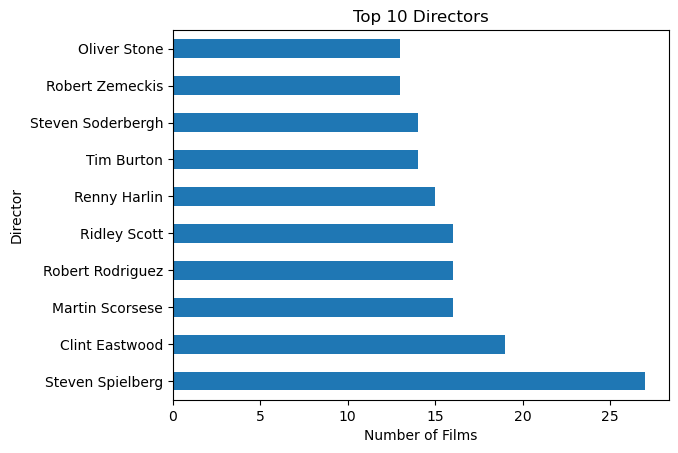

In [34]:
top_directors = df['director'].value_counts().head(10)
top_directors.plot(kind='barh', title='Top 10 Directors')
plt.xlabel('Number of Films')
plt.ylabel('Director')
plt.show()

In [46]:
top_genres = df['genres'].explode().value_counts().head(5).index
for genre in top_genres:
    df[f'genre_{genre}'] = df['genres'].apply(lambda x: int(genre in x))

In [47]:
df

,id,title_x,budget,genres,log_budget,log_revenue,runtime,release_year,revenue,original_language,cast,director,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Adventure
0,19995,Avatar,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19.283571,21.748578,162.0,2009.0,2787965087,en,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,0,0,0,1,1
1,285,Pirates of the Caribbean: At World's End,300000000,"[Adventure, Fantasy, Action]",19.519293,20.683485,169.0,2007.0,961000000,en,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,0,0,0,1,1
2,206647,Spectre,245000000,"[Action, Adventure, Crime]",19.316769,20.596199,148.0,2015.0,880674609,en,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,0,0,0,1,1
3,49026,The Dark Knight Rises,250000000,"[Action, Crime, Drama, Thriller]",19.336971,20.804790,165.0,2012.0,1084939099,en,"[Christian Bale, Michael Caine, Gary Oldman]",Christopher Nolan,1,0,1,1,0
4,49529,John Carter,260000000,"[Action, Adventure, Science Fiction]",19.376192,19.464974,132.0,2012.0,284139100,en,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",Andrew Stanton,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4773,2292,Clerks,27000,[Comedy],10.203629,14.963272,92.0,1994.0,3151130,en,"[Brian O'Halloran, Jeff Anderson, Jason Mewes]",Kevin Smith,0,1,0,0,0
4788,692,Pink Flamingos,12000,"[Horror, Comedy, Crime]",9.392745,15.607270,93.0,1972.0,6000000,en,"[Divine, David Lochary, Mary Vivian Pearce]",John Waters,0,1,0,0,0
4792,36095,Cure,20000,"[Crime, Horror, Mystery, Thriller]",9.903538,11.502885,111.0,1997.0,99000,ja,"[Koji Yakusho, Masato Hagiwara, Tsuyoshi Ujiki]",Kiyoshi Kurosawa,0,0,1,0,0
4796,14337,Primer,7000,"[Science Fiction, Drama, Thriller]",8.853808,12.959282,77.0,2004.0,424760,en,"[Shane Carruth, David Sullivan, Casey Gooden]",Shane Carruth,1,0,1,0,0


In [48]:
top_languages = df['original_language'].value_counts().head(5).index
df['language_encoded'] = df['original_language'].apply(lambda x: x if x in top_languages else 'Other')
df = pd.get_dummies(df, columns=['language_encoded'], drop_first=True)

In [49]:
df

,id,title_x,budget,genres,log_budget,log_revenue,runtime,release_year,revenue,original_language,...,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Adventure,language_encoded_en,language_encoded_es,language_encoded_fr,language_encoded_ja,language_encoded_zh
0,19995,Avatar,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19.283571,21.748578,162.0,2009.0,2787965087,en,...,0,0,0,1,1,True,False,False,False,False
1,285,Pirates of the Caribbean: At World's End,300000000,"[Adventure, Fantasy, Action]",19.519293,20.683485,169.0,2007.0,961000000,en,...,0,0,0,1,1,True,False,False,False,False
2,206647,Spectre,245000000,"[Action, Adventure, Crime]",19.316769,20.596199,148.0,2015.0,880674609,en,...,0,0,0,1,1,True,False,False,False,False
3,49026,The Dark Knight Rises,250000000,"[Action, Crime, Drama, Thriller]",19.336971,20.804790,165.0,2012.0,1084939099,en,...,1,0,1,1,0,True,False,False,False,False
4,49529,John Carter,260000000,"[Action, Adventure, Science Fiction]",19.376192,19.464974,132.0,2012.0,284139100,en,...,0,0,0,1,1,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4773,2292,Clerks,27000,[Comedy],10.203629,14.963272,92.0,1994.0,3151130,en,...,0,1,0,0,0,True,False,False,False,False
4788,692,Pink Flamingos,12000,"[Horror, Comedy, Crime]",9.392745,15.607270,93.0,1972.0,6000000,en,...,0,1,0,0,0,True,False,False,False,False
4792,36095,Cure,20000,"[Crime, Horror, Mystery, Thriller]",9.903538,11.502885,111.0,1997.0,99000,ja,...,0,0,1,0,0,False,False,False,True,False
4796,14337,Primer,7000,"[Science Fiction, Drama, Thriller]",8.853808,12.959282,77.0,2004.0,424760,en,...,1,0,1,0,0,True,False,False,False,False


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

feature_cols = ['log_budget', 'runtime', 'release_year'] + [f'genre_{g}' for g in top_genres] + [col for col in df.columns if col.startswith('language_encoded_')]
X = df[feature_cols]
y = df['log_revenue']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [61]:
y_pred = model.predict(X_test)

In [62]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [63]:
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error: 1.016963189556384
Mean Squared Error: 2.2111039118021196
R^2 Score: 0.5618163101110702
